In [1]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import investpy
import glob
from tqdm.notebook import tqdm

In [2]:
home = r'D:\Libros\Matematica\Data Science\2 - Computational intelligence for Optimization\InvestmentPortfolioOptimization'

In [3]:
def extract_model_data(loc, drop_indiv = True):
    """
    Function to read the outputs of the different models
    """
    all_files = glob.glob(loc + "/*.csv")
    
    df = pd.DataFrame()
    for i, f in tqdm(enumerate(all_files)):
        csv = pd.read_csv(f, header = None)
        if drop_indiv:
            csv.drop(columns=[1], inplace = True)
        csv[3] = i
        df = df.append(csv)
    if drop_indiv:
        df.columns = ['Gen', 'Fitness', 'File']
    else:
        df.columns = ['Gen', 'Indv', 'Fitness', 'File']
        
    #df['Model'] = model
    
    return df

In [4]:
def get_results(df):
    # Get the best indv per generation for each file
    dfm = df.groupby(by=['File', 'Gen']).max().reset_index()

    # Average of the best per generation
    dfm = dfm.groupby(by=['Gen']).mean().reset_index().drop(columns='File')
    
    return dfm

In [5]:
def line_graph(dfm, title_):
    # Create graph
    fig = px.line(dfm, x="Gen", y="Fitness", title=title_)
    fig.show()

# Finding the real values in the best Portfolio found by Model 03:

Extracting the individuals from the best porfolio found by Model 03: 

In [6]:
df3indv = extract_model_data(home + '\\Model03', drop_indiv=False)

In [7]:
df3indv.head()

,Gen,Indv,Fitness,File
0,1,"[3834, 1710, 1846, 3675, 465, 187, 3254, 1176,...",-423616.22,0
1,1,"[2785, 535, 2770, 2148, 2925, 796, 3301, 3987,...",-423332.15,0
2,1,"[1232, 2546, 2433, 839, 3491, 1596, 4008, 2984...",-422176.59,0
3,1,"[2365, 1095, 3416, 1749, 2191, 2997, 1602, 325...",-422153.57,0
4,1,"[1416, 1985, 2908, 451, 3430, 9, 2406, 1614, 1...",1288.45,0


In [8]:
bestFitness = df3indv.Fitness.max()
print('The max fitness is:', bestFitness)

The max fitness is: 110356.04


In [9]:
# Best individuals found:
df3indv[df3indv.Fitness == bestFitness]

,Gen,Indv,Fitness,File
140699,469,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
140998,470,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
140999,470,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
141298,471,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
141299,471,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
...,...,...,...,...
209995,700,"[1617, 1596, 1596, 1617, 1617, 1617, 1596, 365...",110356.04,6
209996,700,"[1617, 1596, 1617, 1596, 1596, 1596, 1617, 161...",110356.04,6
209997,700,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 159...",110356.04,6
209998,700,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 365...",110356.04,6


In [10]:
print('Best fitness was found in the file(s):', df3indv[df3indv.Fitness == bestFitness].File.unique())

Best fitness was found in the file(s): [6]


Let's get keep the best individuals in a single dataframe:

In [11]:
df3best = df3indv[df3indv.Fitness == bestFitness].copy()

To assess how many unique porfolios we have in the best we should transform each of those into sets. 

In [12]:
len(df3best.Indv.unique())

1323

But by doing that, we could remove the portfolios that take the same stock more than once. Besides, each of those values are strings and not lists.

Therefore, Let's take one of those and assess the price:

In [13]:
sol = df3best.Indv.unique()[0]

sol

'[1617, 1596, 1617, 1596, 1596, 1617, 1617, 1617, 1617, 1617, 1617, 1596, 41, 1596, 1617, 1596, 1596, 1596, 1617, 1596, 1617, 1596, 1617, 1617, 1617, 1596, 1218, 3657, 1596, 1617, 1617, 1617, 1617, 1596, 1617, 1596, 1617, 1617, 1617, 1617, 1617, 1596, 1617, 1596, 1617, 1596, 1617, 1596, 1596, 1596]'

In [14]:
# Transforming into a list:
sol = sol.replace('[', '').replace(']', '').replace(' ','').split(',')

# Transforming into int each element in the list
sol = [int(stock) for stock in sol]

In [15]:
sol

[1617,
 1596,
 1617,
 1596,
 1596,
 1617,
 1617,
 1617,
 1617,
 1617,
 1617,
 1596,
 41,
 1596,
 1617,
 1596,
 1596,
 1596,
 1617,
 1596,
 1617,
 1596,
 1617,
 1617,
 1617,
 1596,
 1218,
 3657,
 1596,
 1617,
 1617,
 1617,
 1617,
 1596,
 1617,
 1596,
 1617,
 1617,
 1617,
 1617,
 1617,
 1596,
 1617,
 1596,
 1617,
 1596,
 1617,
 1596,
 1596,
 1596]

In [16]:
# Let's count how many times each stock was selected:

sol_count = []

for stock in sol:
    sol_count.append( (stock,sol.count(stock)) )

# Removing Duplicates
sol_count = set(sol_count)

In [17]:
# Moving back to list for indexing
sol_count = list(sol_count)

sol_count
# (stock , times it appears)

[(1596, 20), (41, 1), (3657, 1), (1617, 27), (1218, 1)]

Let's import the encoding for the stocks to find their symbols and check the prices in the future:

In [18]:
from data.portf_data_price_and_prediction import stocks_symbols

stocks_symbols

['CVX',
 'C',
 'BAC',
 'T',
 'CAT',
 'INTC',
 'MSFT',
 'AA',
 'F',
 'EBAY',
 'DELL',
 'DIS',
 'DOW',
 'CSCO',
 'DE',
 'FDX',
 'GIS',
 'GLW',
 'GT',
 'GS',
 'JPM',
 'KMB',
 'KHC',
 'KO',
 'MCD',
 'LLY',
 'ORCL',
 'MRK',
 'MSI',
 'MMM',
 'ODP',
 'VRTX',
 'MNST',
 'TEVA',
 'FITB',
 'SHLDQ',
 'CTAS',
 'ADSK',
 'DISH',
 'GILD',
 'LIFE',
 'GOOGL',
 'FISV',
 'LBTYA',
 'ADBE',
 'BB',
 'QCOM',
 'BIDU',
 'SOHU',
 'DISCA',
 'RBBN',
 'AMAT',
 'STLD',
 'CDNS',
 'BBBY',
 'MCHP',
 'WYNN',
 'ISRG',
 'NDAQ',
 'RYAAY',
 'INFY',
 'JBLU',
 'SPAR',
 'HSIC',
 'PAYX',
 'VRSN',
 'AAPL',
 'FAST',
 'XRAY',
 'CROX',
 'ZION',
 'NTRS',
 'CTXS',
 'LAMR',
 'PTEN',
 'ATLC',
 'CHRW',
 'SIRI',
 'ALPN',
 'PCAR',
 'PAAS',
 'AMZN',
 'ROST',
 'VIAV',
 'NTES',
 'NTAP',
 'GRMN',
 'COST',
 'CHKP',
 'LRCX',
 'CIEN',
 'IAC',
 'INTU',
 'EXPE',
 'TCOM',
 'UTSI',
 'CTSH',
 'RMBS',
 'YRCW',
 'AKAM',
 'KLAC',
 'JNPR',
 'ATVI',
 'FLEX',
 'AMGN',
 'XLNX',
 'EXPD',
 'EA',
 'PDCO',
 'TROW',
 'BIIB',
 'QRTEA',
 'SCHW',
 'HBAN',
 'NLOK',


In [19]:
sol_count

[(1596, 20), (41, 1), (3657, 1), (1617, 27), (1218, 1)]

Let's see the real performance of the portfolio entirely:

In [20]:
def real_portf_performance(sol_count):
    investment = 0
    profit = 0
    
    for stock_index, count in sol_count:
        
        # Getting the stock symbol
            # Inner slicing: getting the stock
            # External slicing: getting the symbol
        current_stock = stocks_symbols[ stock_index ]
        print('\n',current_stock, stock_index, count)

        # The price in 15 days:
        dfprice = investpy.get_stock_historical_data(stock = current_stock,
                                                    country = 'United States',
                                                    from_date = '30/04/2021',
                                                    to_date = '22/05/2021')
        

        # Getting the deltas in the following 15 days
        dfprice['NetDiff'] = dfprice.Close - dfprice.Open
        
        print('\nBuying', current_stock, 'for:', round(dfprice.Open.iloc[0] * count, 2))
        investment += dfprice.Close.iloc[0] * count
        print('Investment:', round(investment,2))
        
        print('Real Profit?:', round((dfprice.Close.iloc[-1] - dfprice.Close.iloc[0]) * count, 2))
        profit += (dfprice.Close.iloc[-1] - dfprice.Close.iloc[0]) * count
        print('Profit:', round(profit,2))
    
    performance =(profit/investment) * 100
    
    return round(investment,2), round(profit,2), round(performance,3)

In [21]:
invsm, prof, perf = real_portf_performance(sol_count)

print(f"\nThe performance in reality is {perf}%")


 NTN 1596 20

Buying NTN for: 616.4
Investment: 996.0
Real Profit?: -716.2
Profit: -716.2

 GOOGL 41 1

Buying GOOGL for: 2368.02
Investment: 3349.5
Real Profit?: -59.37
Profit: -775.57

 STRS 3657 1

Buying STRS for: 35.62
Investment: 3384.65
Real Profit?: -8.99
Profit: -784.56

 SEB 1617 27

Buying SEB for: 96225.84
Investment: 99990.38
Real Profit?: 2683.53
Profit: 1898.97

 MCHX 1218 1

Buying MCHX for: 2.97
Investment: 99993.28
Real Profit?: -0.3
Profit: 1898.67

The performance in reality is 1.899%


In [22]:
print(invsm, prof)

99993.28 1898.67


Although we expected a performance over 10%. The real performance was 1.9%.

We could explore other solutions in the dataframe above, but a preprocessing is needed, since we have strings in the Indv columns, let's clean it and get the unique solutions. For that, let's use a function:

In [23]:
def clean_indv(indiv):
    # Transforming into a list:
    sol = indiv.replace('[', '').replace(']', '').replace(' ','').split(',')

    # Transforming into int each element in the list
    sol = [int(stock) for stock in sol]
    
    # Let's count how many times each stock was selected:
    sol_count = []
    for stock in sol:
        sol_count.append( (stock,sol.count(stock)) )

    # Removing Duplicates
    sol_count = set(sol_count)
    
    # Moving back to list for indexing
    sol_count = list(sol_count)

    return sol_count
    # (stock , times it appears)

Applying on the dataframe:

In [24]:
df3best.head()

,Gen,Indv,Fitness,File
140699,469,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
140998,470,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
140999,470,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
141298,471,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6
141299,471,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6


In [25]:
df3best['Portfolios'] = df3best.Indv.apply(clean_indv)

df3best.head()

,Gen,Indv,Fitness,File,Portfolios
140699,469,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6,"[(1596, 20), (41, 1), (3657, 1), (1617, 27), (..."
140998,470,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6,"[(1596, 20), (41, 1), (3657, 1), (1617, 27), (..."
140999,470,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6,"[(1596, 20), (41, 1), (3657, 1), (1617, 27), (..."
141298,471,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6,"[(1596, 20), (41, 1), (3657, 1), (1617, 27), (..."
141299,471,"[1617, 1596, 1617, 1596, 1596, 1617, 1617, 161...",110356.04,6,"[(1596, 20), (41, 1), (3657, 1), (1617, 27), (..."


Takes quite some time. It is the same portfolio in all the iterations.

In [26]:
df3best.Portfolios.iloc[0]

[(1596, 20), (41, 1), (3657, 1), (1617, 27), (1218, 1)]

In [27]:
df3best.Portfolios.iloc[1050]

[(1596, 20), (41, 1), (3657, 1), (1617, 27), (1218, 1)]

Let's save the results in a single dataframe for a bar graph below:

In [28]:
dfgraph = pd.DataFrame(columns=['Model','Invested', 'Expected', 'RealReturn'])

dfgraph.loc[0] = ['Model03', invsm, round(((bestFitness/invsm) -1)*100,2), perf]

dfgraph

,Model,Invested,Expected,RealReturn
0,Model03,99993.28,10.36,1.899


# Let's see model 05:

In [29]:
df5indv = extract_model_data(home + '\\Model05', drop_indiv=False)

In [30]:
bestFitness5 = df5indv.Fitness.max()
print('The max fitness is:', bestFitness5)

The max fitness is: 109836.09


In [31]:
# Keeping the bests indv:
df5best = df5indv[df5indv.Fitness == bestFitness5].copy()

In [32]:
df5best.head()

,Gen,Indv,Fitness,File
203699,679,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48
203999,680,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48
204299,681,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48
204599,682,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48
204899,683,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48


In [33]:
df5best['Portfolios'] = df5best.Indv.apply(clean_indv)

df5best.head()

,Gen,Indv,Fitness,File,Portfolios
203699,679,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48,"[(1617, 26), (587, 1), (3386, 2), (349, 14), (..."
203999,680,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48,"[(1617, 26), (587, 1), (3386, 2), (349, 14), (..."
204299,681,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48,"[(1617, 26), (587, 1), (3386, 2), (349, 14), (..."
204599,682,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48,"[(1617, 26), (587, 1), (3386, 2), (349, 14), (..."
204899,683,"[1617, 1063, 349, 1617, 1617, 349, 3386, 349, ...",109836.09,48,"[(1617, 26), (587, 1), (3386, 2), (349, 14), (..."


In [34]:
# Getting the result of the investments:
invsm5, prof5, perf5 = real_portf_performance(df5best.Portfolios.iloc[0])real_portf_performance(df2best.Portfolios.iloc[0])

print(f"\nThe performance in reality is {perf5}%")


 SEB 1617 26

Buying SEB for: 92661.92
Investment: 93027.74
Real Profit?: 2584.14
Profit: 2584.14

 AEZS 587 1

Buying AEZS for: 1.07
Investment: 93028.8
Real Profit?: -0.16
Profit: 2583.98

 TRCH 3386 2

Buying TRCH for: 4.48
Investment: 93033.03
Real Profit?: 0.29
Profit: 2584.27

 HOV 349 14

Buying HOV for: 1867.6
Investment: 94889.29
Real Profit?: -159.88
Profit: 2424.39

 FLY 2063 2

Buying FLY for: 33.84
Investment: 94923.13
Real Profit?: 0.06
Profit: 2424.45

 YPF 4012 1

Buying YPF for: 3.93
Investment: 94926.91
Real Profit?: 0.72
Profit: 2425.17

 NVR 3906 1

Buying NVR for: 4990.0
Investment: 99945.01
Real Profit?: -362.9
Profit: 2062.27

 TBI 2125 1

Buying TBI for: 27.79
Investment: 99973.31
Real Profit?: -1.7
Profit: 2060.57

 LTRX 1206 1

Buying LTRX for: 5.22
Investment: 99978.77
Real Profit?: 0.0
Profit: 2060.57

 HSON 1063 1

Buying HSON for: 17.68
Investment: 99996.52
Real Profit?: -0.14
Profit: 2060.43

The performance in reality is 2.06%


In [35]:
dfgraph.loc[1] = ['Model05', invsm5, round(((bestFitness5/invsm5) -1)*100,2), perf5]

dfgraph

,Model,Invested,Expected,RealReturn
0,Model03,99993.28,10.36,1.899
1,Model05,99996.52,9.84,2.060


# Let's see model 02:

In [36]:
df2indv = extract_model_data(home + '\\Model02', drop_indiv=False)

In [37]:
bestFitness2 = df2indv.Fitness.max()
print('The max fitness is:', bestFitness2)

The max fitness is: 109822.92


In [38]:
# Keeping the bests indv:
df2best = df2indv[df2indv.Fitness == bestFitness2].copy()

df2best

,Gen,Indv,Fitness,File
206699,689,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
206999,690,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
207298,691,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
207299,691,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
207599,692,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
207898,693,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
207899,693,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
208199,694,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
208499,695,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28
208799,696,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28


In [39]:
df2best['Portfolios'] = df2best.Indv.apply(clean_indv)

df2best.head()

,Gen,Indv,Fitness,File,Portfolios
206699,689,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28,"[(3440, 3), (2728, 2), (3136, 1), (3899, 1), (..."
206999,690,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28,"[(3440, 3), (2728, 2), (3136, 1), (3899, 1), (..."
207298,691,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28,"[(3440, 3), (2728, 2), (3136, 1), (3899, 1), (..."
207299,691,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28,"[(3440, 3), (2728, 2), (3136, 1), (3899, 1), (..."
207599,692,"[1617, 1617, 1617, 1617, 949, 2880, 1617, 949,...",109822.92,28,"[(3440, 3), (2728, 2), (3136, 1), (3899, 1), (..."


In [40]:
# Getting the result of the investments:
invsm2, prof2, perf2 = real_portf_performance(df2best.Portfolios.iloc[0])

print(f"\nThe performance in reality is {perf2}%")


 MARA 3440 3

Buying MARA for: 104.94
Investment: 110.34
Real Profit?: -47.67
Profit: -47.67

 OII 2728 2

Buying OII for: 22.12
Investment: 131.84
Real Profit?: 6.7
Profit: -40.97

 VERI 3136 1

Buying VERI for: 23.79
Investment: 155.96
Real Profit?: -6.18
Profit: -47.15

 WSM 3899 1

Buying WSM for: 174.36
Investment: 326.71
Real Profit?: -7.75
Profit: -54.9

 ESGR 949 12

Buying ESGR for: 3030.36
Investment: 3340.87
Real Profit?: -84.96
Profit: -139.86

 FFBW 2880 4

Buying FFBW for: 44.88
Investment: 3385.67
Real Profit?: 0.64
Profit: -139.22

 SEB 1617 27

Buying SEB for: 96225.84
Investment: 99991.4
Real Profit?: 2683.53
Profit: 2544.31

The performance in reality is 2.545%


In [41]:
dfgraph.loc[2] = ['Model02', invsm2, round(((bestFitness2/invsm2) -1)*100,2), perf2]

dfgraph

,Model,Invested,Expected,RealReturn
0,Model03,99993.28,10.36,1.899
1,Model05,99996.52,9.84,2.060
2,Model02,99991.40,9.83,2.545


In [49]:
dfgraph['Variation'] = dfgraph.RealReturn - dfgraph.Expected 

dfgraph

,Model,Invested,Expected,RealReturn,Variation
0,Model03,99993.28,10.36,1.899,-8.461
1,Model05,99996.52,9.84,2.060,-7.780
2,Model02,99991.40,9.83,2.545,-7.285


Let's create a barplot:

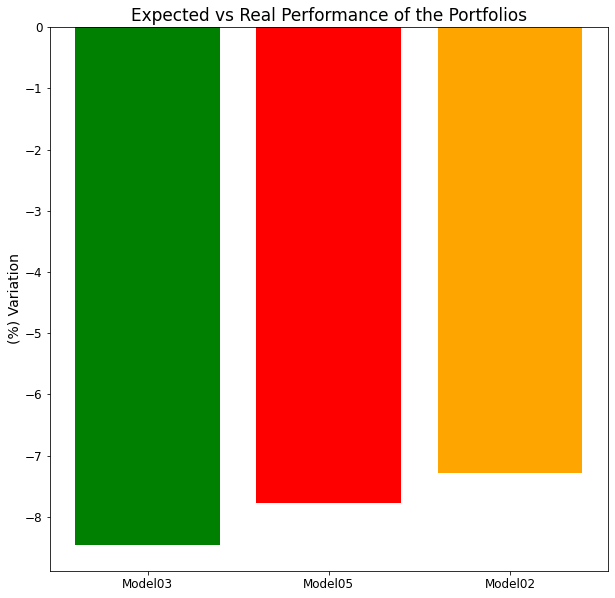

In [56]:
plt.figure(figsize=(10,10))
plt.style.use( 'seaborn-bright' )

plt.bar(dfgraph.Model,dfgraph.Variation, color = ['g', 'r', 'orange'])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('(%) Variation', fontsize=14)
plt.title('Expected vs Real Performance of the Portfolios', fontsize=17)

plt.savefig('ModelsInReality.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

# Description of each Portfolio:

In [43]:
def port_info(sol_count):
    investment = 0
    profit = 0
    descr = []
    
    for stock_index, count in sol_count:
        
        # Getting the stock symbol
            # Inner slicing: getting the stock
            # External slicing: getting the symbol
        current_stock = stocks_symbols[ stock_index ]
        print('\nStock:',current_stock, 'Ammount:', count)
        
        print('\n', 
              investpy.get_stock_company_profile(stock=current_stock, country='United States', language='english'))

        # The price in 15 days:
        dfprice = investpy.get_stock_historical_data(stock = current_stock,
                                                    country = 'United States',
                                                    from_date = '30/04/2021',
                                                    to_date = '22/05/2021')
        

        # Getting the deltas in the following 15 days
        dfprice['NetDiff'] = dfprice.Close - dfprice.Open
        
        #print('\nBuying', current_stock, 'for:', round(dfprice.Open.iloc[0] * count, 2))
        investment += dfprice.Close.iloc[0] * count
        #print('Investment:', round(investment,2))
        
        #print('Real Profit?:', round((dfprice.Close.iloc[-1] - dfprice.Close.iloc[0]) * count, 2))
        profit += (dfprice.Close.iloc[-1] - dfprice.Close.iloc[0]) * count
        print('Profit:', round(profit,2))
    
    performance =(profit/investment) * 100
    
    print(round(performance,2))
    
    return

### Model03:

In [44]:
print(sol_count)

port_info(sol_count)

[(1596, 20), (41, 1), (3657, 1), (1617, 27), (1218, 1)]

Stock: NTN Ammount: 20

 {'url': 'https://www.investing.com/equities/ntn-buzztime?cid=36269-company-profile', 'desc': None}
Profit: -716.2

Stock: GOOGL Ammount: 1

 {'url': 'https://www.investing.com/equities/google-inc-company-profile', 'desc': "Alphabet Inc. is a holding company. The Company's businesses include Google Inc. (Google) and its Internet products, such as Access, Calico, CapitalG, GV, Nest, Verily, Waymo and X. The Company's segments include Google and Other Bets. The Google segment includes its Internet products, such as Search, Ads, Commerce, Maps, YouTube, Google Cloud, Android, Chrome and Google Play, as well as its hardware initiatives. The Google segment is engaged in advertising, sales of digital content, applications and cloud offerings, and sales of hardware products. The Other Bets segment is engaged in the sales of Internet and television services through Google Fiber, sales of Nest products and services

### Model 05:

In [45]:
print(df5best.Portfolios.iloc[0])

port_info(df5best.Portfolios.iloc[0])

[(1617, 26), (587, 1), (3386, 2), (349, 14), (2063, 2), (4012, 1), (3906, 1), (2125, 1), (1206, 1), (1063, 1)]

Stock: SEB Ammount: 26

 {'url': 'https://www.investing.com/equities/seaboard-corp?cid=36803-company-profile', 'desc': None}
Profit: 2584.14

Stock: AEZS Ammount: 1

 {'url': 'https://www.investing.com/equities/aeterna-zentaris-inc?cid=15348-company-profile', 'desc': None}
Profit: 2583.98

Stock: TRCH Ammount: 2

 {'url': 'https://www.investing.com/equities/torchlight-energ-company-profile', 'desc': 'Torchlight Energy Resources, Inc. (Torchlight) is an energy company. The Company is engaged in the acquisition, exploration, exploitation and/or development of oil and natural gas properties in the United States. The Company is primarily focused on the acquisition of early stage projects, the development and delineation of these projects, and then the monetization of those assets once these activities are completed. Torchlight has interests in four oil and gas projects: the Orogr

Profit: 2060.43
2.06


### Model 02:

In [46]:
print(df2best.Portfolios.iloc[0])

port_info(df2best.Portfolios.iloc[0])

[(3440, 3), (2728, 2), (3136, 1), (3899, 1), (949, 12), (2880, 4), (1617, 27)]

Stock: MARA Ammount: 3

 {'url': 'https://www.investing.com/equities/marathon-pa-company-profile', 'desc': 'Marathon Patent Group, Inc. is a digital asset technology company. The Company focuses on the blockchain ecosystem and the generation of digital assets. The Company is operating one mining facility in Quebec, with plans to open additional facilities in the future. The Company offers managed mining solutions on its robust proprietary infrastructure and smart mining software. The Company intends to power and secure blockchains by verifying blockchain transactions using custom hardware and software. It is using its hardware to mine bitcoin (BTC) and expect to mine BTC and ether (ETH), and potentially other cryptocurrencies.'}
Profit: -47.67

Stock: OII Ammount: 2

 {'url': 'https://www.investing.com/equities/oceanerring-international-company-profile', 'desc': "Oceaneering International, Inc. is an oilfie

# Creating a table and a dataframe to show the above information better:

In [57]:
# Importing information about expected future prices
from data.portf_data_price_and_prediction import stock_after

stock_after

[105.95,
 69.16,
 41.19,
 32.01,
 236.02,
 57.83,
 256.0,
 36.74,
 11.49,
 55.04,
 102.33,
 184.26,
 65.1,
 54.8,
 364.08,
 282.17,
 62.68,
 44.27,
 17.62,
 355.47,
 157.67,
 130.69,
 42.94,
 53.91,
 237.33,
 186.77,
 78.04,
 72.92,
 190.48,
 201.11,
 43.37,
 206.25,
 96.99,
 11.22,
 40.78,
 0.1,
 345.72,
 279.33,
 47.48,
 65.72,
 3.36,
 2433.65,
 120.26,
 25.84,
 496.08,
 6.74,
 130.52,
 223.61,
 17.53,
 40.29,
 6.74,
 130.36,
 53.29,
 127.55,
 27.64,
 146.5,
 127.99,
 874.4,
 164.21,
 112.75,
 18.08,
 20.62,
 35.43,
 74.66,
 98.52,
 230.22,
 125.27,
 52.99,
 66.32,
 95.29,
 56.2,
 115.99,
 128.54,
 100.9,
 6.88,
 30.83,
 96.89,
 6.09,
 11.05,
 91.7,
 30.06,
 3312.5,
 135.37,
 15.54,
 116.91,
 76.21,
 138.64,
 370.04,
 112.75,
 607.89,
 44.83,
 257.7,
 418.59,
 188.17,
 37.76,
 0.97,
 80.29,
 19.25,
 10.62,
 110.72,
 329.02,
 24.55,
 89.77,
 15.71,
 242.11,
 123.28,
 111.87,
 140.65,
 31.7,
 181.66,
 263.97,
 11.05,
 71.26,
 16.04,
 21.81,
 601.08,
 77.0,
 114.3,
 116.34,
 12.3,
 145.

In [117]:
def real_portf_performance_data(sol_count, evaluated_model):

    dfresults = pd.DataFrame(columns=['Model', 'Invested', 'ExpectedValueAtSell', 'RealValueAtSell'])
    
    for stock_index, count in sol_count:
        
        # Getting the stock symbol
            # Inner slicing: getting the stock
            # External slicing: getting the symbol
        current_stock = stocks_symbols[ stock_index ]
        
        print('\nStock:',current_stock,'Index:', stock_index, 'Times:', count)

        # The price in 15 days:
        dfprice = investpy.get_stock_historical_data(stock = current_stock,
                                                    country = 'United States',
                                                    from_date = '30/04/2021',
                                                    to_date = '22/05/2021')   
        
        # Investment for this particular stock.
        particular_investment = round(dfprice.Close.iloc[0] * count,2)
        print('\nBuying', current_stock, 'for:', particular_investment)
        
        #getting the predicted price
        pred_price = stock_after[ stock_index ] * count
        print('Predicted Price:', pred_price)
        
        real_price = round(dfprice.Close.iloc[-1] * count,2)
        print('Real Price:', real_price)
    
        real_profit = round((dfprice.Close.iloc[-1] - dfprice.Close.iloc[0]) * count, 2)
        print('Real Profit:', real_profit)
        
        #profit += (dfprice.Close.iloc[-1] - dfprice.Close.iloc[0]) * count
        #print('Profit:', round(profit,2))
        
        dfresults.loc[current_stock] = [evaluated_model, particular_investment, pred_price, real_price]
    
    # Creating the individual return and prediction accuracy for each stock:
    dfresults['Return(%)'] = round(((dfresults.RealValueAtSell - dfresults.Invested )/dfresults.Invested)*100,2)
    dfresults['Prediction_Acc'] = round((dfresults.RealValueAtSell/dfresults.ExpectedValueAtSell)*100,2)

    return dfresults

In [118]:
r = real_portf_performance_data(sol_count, 'model03')


Stock: NTN Index: 1596 Times: 20

Buying NTN for: 996.0
Predicted Price: 1709.4
Real Price: 279.8
Real Profit: -716.2

Stock: GOOGL Index: 41 Times: 1

Buying GOOGL for: 2353.5
Predicted Price: 2433.65
Real Price: 2294.13
Real Profit: -59.37

Stock: STRS Index: 3657 Times: 1

Buying STRS for: 35.15
Predicted Price: 35.06
Real Price: 26.16
Real Profit: -8.99

Stock: SEB Index: 1617 Times: 27

Buying SEB for: 96605.73
Predicted Price: 106174.8
Real Price: 99289.26
Real Profit: 2683.53

Stock: MCHX Index: 1218 Times: 1

Buying MCHX for: 2.9
Predicted Price: 3.13
Real Price: 2.6
Real Profit: -0.3


In [119]:
r.head()

,Model,Invested,ExpectedValueAtSell,RealValueAtSell,Return(%),Prediction_Acc
NTN,model03,996.00,1709.40,279.80,-71.91,16.37
GOOGL,model03,2353.50,2433.65,2294.13,-2.52,94.27
STRS,model03,35.15,35.06,26.16,-25.58,74.61
SEB,model03,96605.73,106174.80,99289.26,2.78,93.51
MCHX,model03,2.90,3.13,2.60,-10.34,83.07


### Creating a dataframe with the results for each model:

In [120]:
dfperf = pd.DataFrame()

for solutions, mod in [(sol_count, 'model03'),
                       (df5best.Portfolios.iloc[0],'model05'),
                       (df2best.Portfolios.iloc[0],'model02')]:
    
    dfperf = dfperf.append( real_portf_performance_data(solutions, mod) )


Stock: NTN Index: 1596 Times: 20

Buying NTN for: 996.0
Predicted Price: 1709.4
Real Price: 279.8
Real Profit: -716.2

Stock: GOOGL Index: 41 Times: 1

Buying GOOGL for: 2353.5
Predicted Price: 2433.65
Real Price: 2294.13
Real Profit: -59.37

Stock: STRS Index: 3657 Times: 1

Buying STRS for: 35.15
Predicted Price: 35.06
Real Price: 26.16
Real Profit: -8.99

Stock: SEB Index: 1617 Times: 27

Buying SEB for: 96605.73
Predicted Price: 106174.8
Real Price: 99289.26
Real Profit: 2683.53

Stock: MCHX Index: 1218 Times: 1

Buying MCHX for: 2.9
Predicted Price: 3.13
Real Price: 2.6
Real Profit: -0.3

Stock: SEB Index: 1617 Times: 26

Buying SEB for: 93027.74
Predicted Price: 102242.40000000001
Real Price: 95611.88
Real Profit: 2584.14

Stock: AEZS Index: 587 Times: 1

Buying AEZS for: 1.06
Predicted Price: 1.36
Real Price: 0.9
Real Profit: -0.16

Stock: TRCH Index: 3386 Times: 2

Buying TRCH for: 4.23
Predicted Price: 3.64
Real Price: 4.52
Real Profit: 0.29

Stock: HOV Index: 349 Times: 14



In [121]:
print(f"Avg Return%: {dfperf[dfperf.Model=='model03']['Return(%)'].mean()}")
print(f"Avg PredAcc%: {dfperf[dfperf.Model=='model03']['Prediction_Acc'].mean()}")

dfperf[dfperf.Model=='model03']

Avg Return%: -21.514
Avg PredAcc%: 72.366


,Model,Invested,ExpectedValueAtSell,RealValueAtSell,Return(%),Prediction_Acc
NTN,model03,996.00,1709.40,279.80,-71.91,16.37
GOOGL,model03,2353.50,2433.65,2294.13,-2.52,94.27
STRS,model03,35.15,35.06,26.16,-25.58,74.61
SEB,model03,96605.73,106174.80,99289.26,2.78,93.51
MCHX,model03,2.90,3.13,2.60,-10.34,83.07


In [122]:
print(f"Avg Return%: {dfperf[dfperf.Model=='model05']['Return(%)'].mean()}")
print(f"Avg PredAcc%: {dfperf[dfperf.Model=='model05']['Prediction_Acc'].mean()}")

dfperf[dfperf.Model=='model05']

Avg Return%: -0.8859999999999999
Avg PredAcc%: 97.251


,Model,Invested,ExpectedValueAtSell,RealValueAtSell,Return(%),Prediction_Acc
SEB,model05,93027.74,102242.40,95611.88,2.78,93.51
AEZS,model05,1.06,1.36,0.90,-15.09,66.18
TRCH,model05,4.23,3.64,4.52,6.86,124.18
HOV,model05,1856.26,2113.30,1696.38,-8.61,80.27
FLY,model05,33.84,33.82,33.90,0.18,100.24
YPF,model05,3.78,3.24,4.50,19.05,138.89
NVR,model05,5018.10,5383.85,4655.20,-7.23,86.47
TBI,model05,28.30,28.29,26.60,-6.01,94.03
LTRX,model05,5.46,5.21,5.46,0.00,104.80
HSON,model05,17.75,20.98,17.61,-0.79,83.94


In [123]:
print(f"Avg Return%: {dfperf[dfperf.Model=='model02']['Return(%)'].mean()}")
print(f"Avg PredAcc%: {dfperf[dfperf.Model=='model02']['Prediction_Acc'].mean()}")

dfperf[dfperf.Model=='model02']

Avg Return%: -5.83
Avg PredAcc%: 90.21857142857142


,Model,Invested,ExpectedValueAtSell,RealValueAtSell,Return(%),Prediction_Acc
MARA,model02,110.34,114.18,62.67,-43.20,54.89
OII,model02,21.50,22.02,28.20,31.16,128.07
VERI,model02,24.12,22.74,17.94,-25.62,78.89
WSM,model02,170.75,185.62,163.00,-4.54,87.81
ESGR,model02,3014.16,3257.40,2929.20,-2.82,89.92
FFBW,model02,44.80,46.16,45.44,1.43,98.44
SEB,model02,96605.73,106174.80,99289.26,2.78,93.51


We see that the average performances in return and Prediction Acc favor model05. But this can be misleading, we should look at the relative importance of each stock in the portfolio investment.

For this, let's use a function:

In [177]:
def relative_performance(df, model):
    
    # Filtering per model
    df = df[df.Model == model]
    
    # Getting the invested money
    invs = df.Invested.sum()
    
    # Taking the weights
    df['Investment_Weight'] = round((df.Invested/invs) * 100, 2)
    
    # Getting the weights
    df['return_importance'] = abs(df.Investment_Weight * df['Return(%)'])
    
    # Measuring the impact on the portfolio of that stock:
    df['Return_Importance_Weighted'] = round((df['return_importance']/ df['return_importance'].sum()) * 100,3)
    
    # Adding direction of importance + or -
    df['Return_Importance_Weighted'] = np.where(df['Return(%)'] > 0, df['Return_Importance_Weighted'], -df['Return_Importance_Weighted'])
    
    return df.drop(columns=['return_importance'])

In [178]:
# Creating Relative values

dfperf_relative = pd.DataFrame()

for m in ['model03', 'model05', 'model02']:
    
    dfperf_relative = dfperf_relative.append( relative_performance(dfperf, m) )

<ipython-input-177-a2b0e7e176f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Investment_Weight'] = round((df.Invested/invs) * 100, 2)
<ipython-input-177-a2b0e7e176f3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return_importance'] = abs(df.Investment_Weight * df['Return(%)'])
<ipython-input-177-a2b0e7e176f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [179]:
dfperf_relative

,Model,Invested,ExpectedValueAtSell,RealValueAtSell,Return(%),Prediction_Acc,Investment_Weight,Return_Importance_Weighted
NTN,model03,996.00,1709.40,279.80,-71.91,16.37,1.00,-20.698
GOOGL,model03,2353.50,2433.65,2294.13,-2.52,94.27,2.35,-1.705
STRS,model03,35.15,35.06,26.16,-25.58,74.61,0.04,-0.295
SEB,model03,96605.73,106174.80,99289.26,2.78,93.51,96.61,77.303
MCHX,model03,2.90,3.13,2.60,-10.34,83.07,0.00,-0.000
SEB,model05,93027.74,102242.40,95611.88,2.78,93.51,93.03,83.123
AEZS,model05,1.06,1.36,0.90,-15.09,66.18,0.00,-0.000
TRCH,model05,4.23,3.64,4.52,6.86,124.18,0.00,0.000
HOV,model05,1856.26,2113.30,1696.38,-8.61,80.27,1.86,-5.147
FLY,model05,33.84,33.82,33.90,0.18,100.24,0.03,0.002


### Graph:

In [191]:
df_3 = dfperf_relative[dfperf_relative.Model == 'model03']
df_5 = dfperf_relative[dfperf_relative.Model == 'model05']
df_2 = dfperf_relative[dfperf_relative.Model == 'model02']

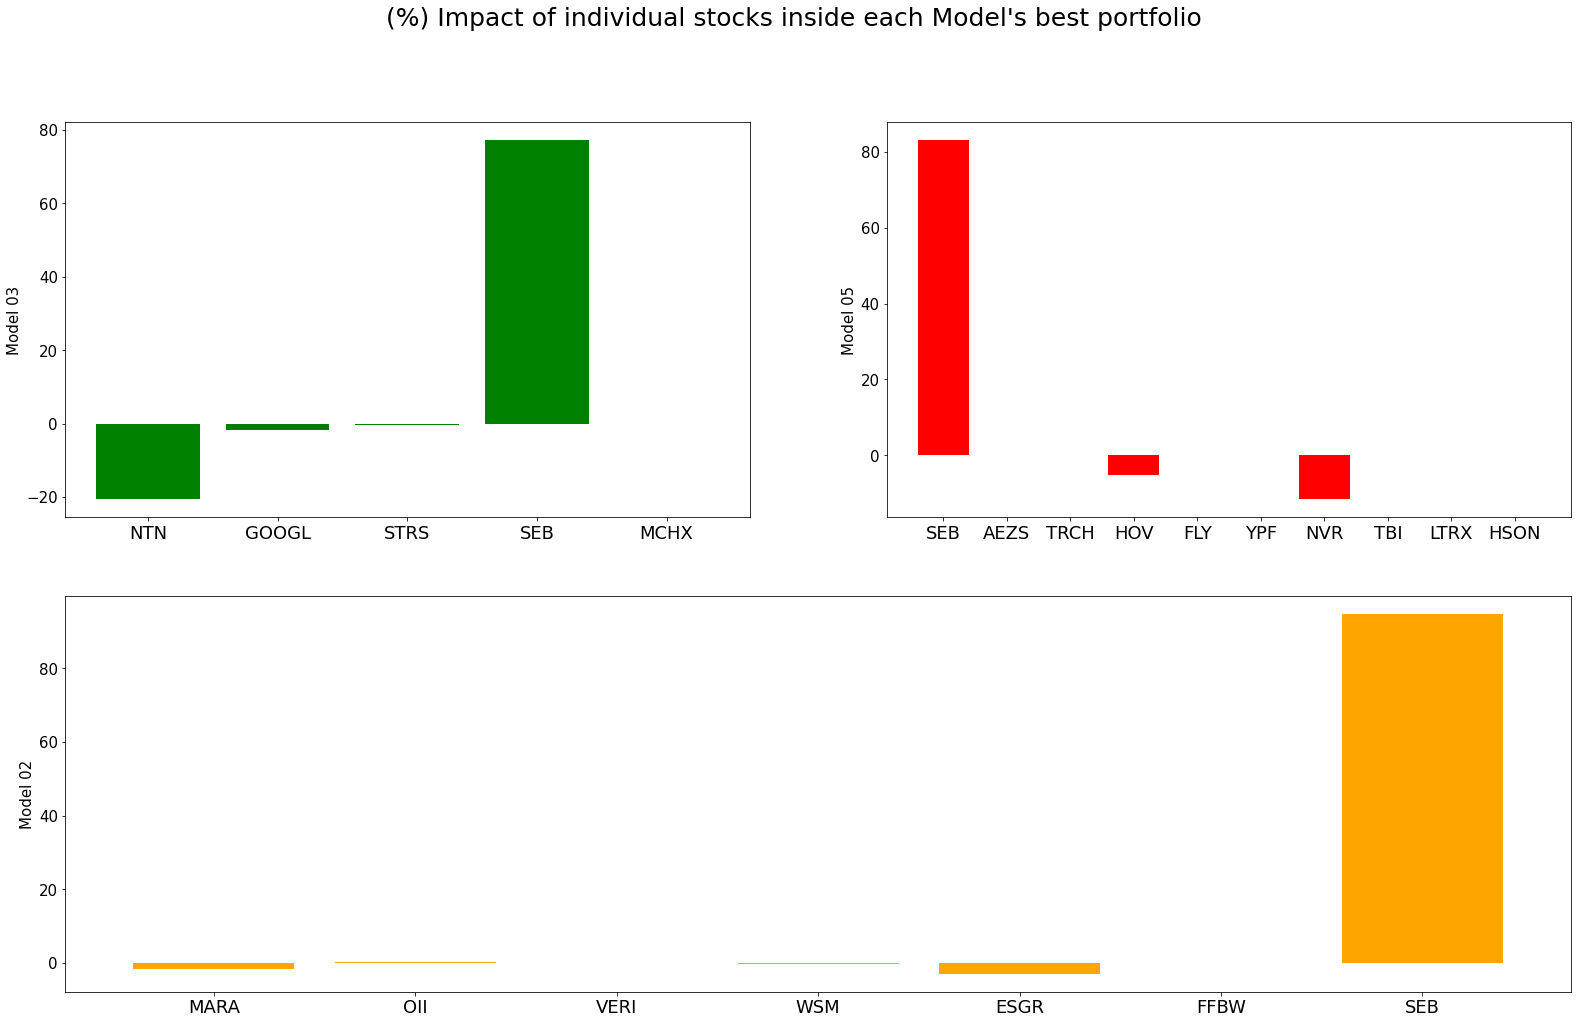

In [220]:
plt.figure(figsize=(27,16))
plt.subplot(221)
plt.bar(df_3.index,df_3.Return_Importance_Weighted, color = 'g')
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.ylabel('Model 03', fontsize=15)
    
plt.subplot(222)
plt.bar(df_5.index,df_5.Return_Importance_Weighted, color = 'r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.ylabel('Model 05', fontsize=15)
    
plt.subplot(212)
plt.bar(df_2.index,df_2.Return_Importance_Weighted, color = 'orange')
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.ylabel('Model 02', fontsize=15)

plt.suptitle('(%) Impact of individual stocks inside each Model\'s best portfolio', fontsize=25)

plt.savefig('IndvStocksReturn.png', bbox_inches='tight', pad_inches=0.1)

Text(0, 0.5, 'Model02')

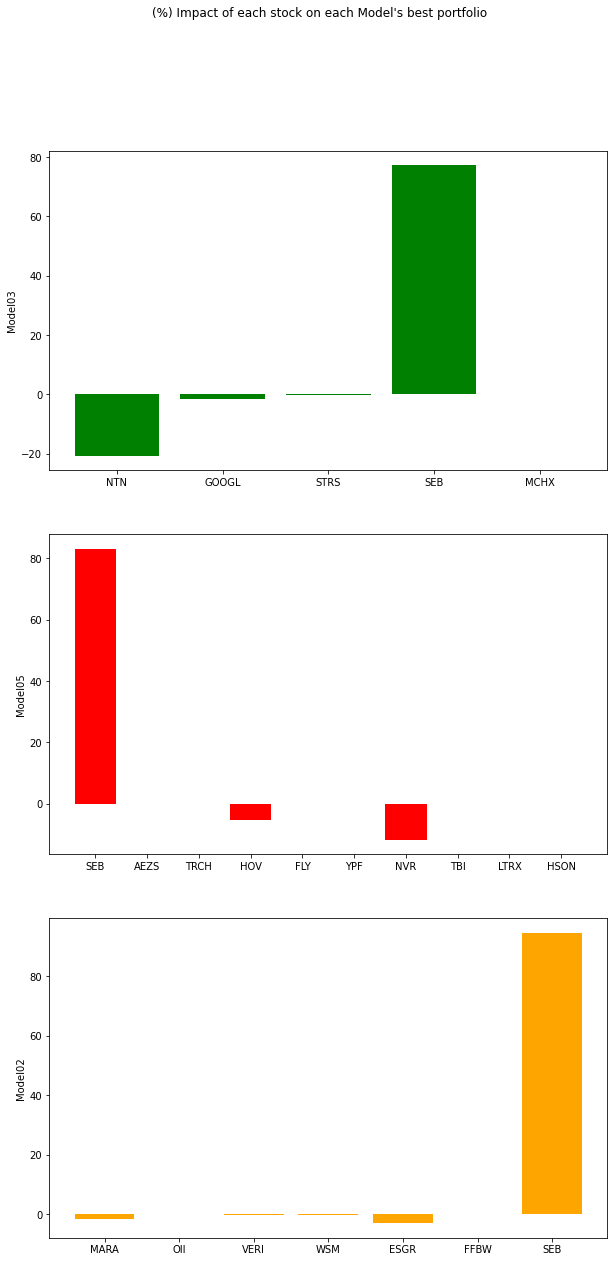

In [197]:
fig, (ax3, ax5, ax2) = plt.subplots((2,, figsize=(10,20))
fig.suptitle('(%) Impact of each stock on each Model\'s best portfolio')

ax3.bar(df_3.index,df_3.Return_Importance_Weighted, color = 'g')
ax3.set_ylabel('Model03')

ax5.bar(df_5.index,df_5.Return_Importance_Weighted, color = 'r')
ax5.set_ylabel('Model05')

ax2.bar(df_2.index,df_2.Return_Importance_Weighted, color = 'orange')
ax2.set_ylabel('Model02')